# Assignment 4

## Everything below this point are answers to the assignment questions.

### 1. Clustering the Iris Dataset

Loading the Iris Dataset and Pandas:

In [3]:
import pandas as pd

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [5]:
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
                                                "Petal Length", "Petal Width",
                                                "Name"])
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### **1.1** CLUSTERING DATA WITH K-MEANS

*(a) Plot a scatter plot matrix between all features. Use the “Name” column to color the points. Note that you may have to convert the “Name” column into integers to use it for specifying the plot colors. Resize the plot as needed. Do the three classes appear to be equally well-separated or is one more different than the others?*

In [28]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

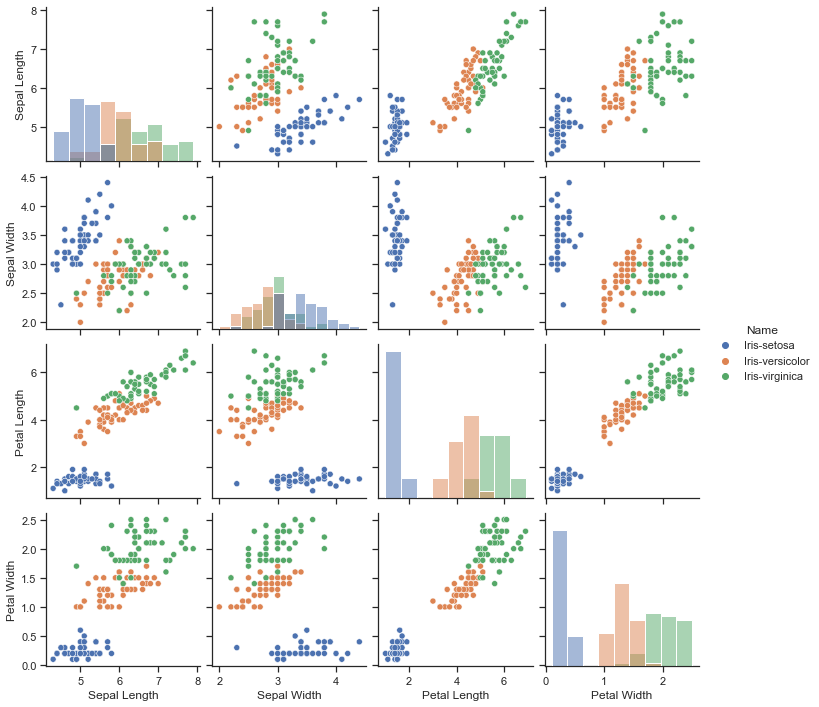

In [29]:
#Using SOME code from: https://www.geeksforgeeks.org/pair-plots-using-scatter-matrix-in-pandas/
#Code from: https://stackoverflow.com/questions/46383645/seaborn-and-pd-scatter-matrix-plot-color-issues
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Name", diag_kind="hist")

**Note:** Note that I purposely did not change the plot size of this graph because it was big enough already and I also did not want to make it any smaller (I think the default size is appropriate).

For all features, iris-setosa is separated from the other two iris sepcies (versicolor and virginica), and thus is more different than the other two species. Meanwhile, for most of the features, iris-versicolor and iris-virginica are less well separated and tend to have some overlap in their feature values.


*(b) Cluster the the data using k-Means clustering. Form 3 clusters (n clusters=3), with the four features as the input data, and plot the resulting clusters as a 2D scatter plot. Use “Petal Length” for the x-axis of the plot and “Petal Width” for the y-axis, with each point colored according to its assigned cluster label.*

In [30]:
from sklearn.cluster import KMeans
import numpy as np

In [31]:
#Code snippets taken from Professor's Week 5 clustering notebook 
#and https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
#Select all the values in all 4 columns (except Name)
data = df.iloc[:, [0,1,2,3]].values
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [73]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit(data)
y_kmeans = kmeans.predict(data)
print(labels.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


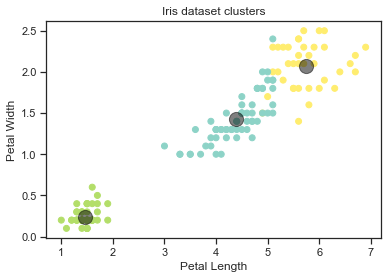

In [74]:
#Visualizing the clusters
#First param is the x-axis data (petal length), and the second param is y-axis data (Petal Width)
plt.scatter(data[:, 2], data[:, 3], c=kmeans.labels_.astype(float), cmap="Set3")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)
plt.title("Iris dataset clusters")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

*(c) Show the cross-tabulation of the actual class values and the cluster labels. How many instances belong to an incorrect cluster? Do any of the cluster labels correspond perfectly to a class label? Do these observations agree with what you observed from the scatter plot matrix?*

In [87]:
pd.crosstab(labels.labels_, df["Name"])
cross = cross.rename_axis("cluster_label")
cross

Name,Iris-setosa,Iris-versicolor,Iris-virginica
cluster_label,,,
0,0,48,14
1,50,0,0
2,0,2,36


From the crosstab table, we can that one of the cluster labels corresponds perfectly to a class label. In this case, the one that corresponds perfectly is cluster 1, where all its instances belong to the iris-setosa species. However, the other two species have instances that don't correspond perfectly to clusters; most iris-versicolor species are clustered in cluster 0, but there are two in cluster 2. Similarly, most iris-virginica instances are in cluster 2, but there are 14 instances in cluster 0. This makes sense when comparing the scatterplot matrix. The reason being, iris-setosa is clearly "separated" far from the other two iris species, while iris-versicolor and iris-virginica had some overlap in values, so it makes sense that some would get grouped together where the overlap occurs.

#### **1.2** HIERARCHICAL CLUSTERING OF FEATURES

*(a) To assess how similar the features are, calculate the mutual information between all pairs of features; that is, use each feature as the target variable once in the calculation. Create a DataFrame from the output and label the indices and columns of the DataFrame with the appropriate feature names.*

In [91]:
from sklearn.feature_selection import mutual_info_regression

In [92]:
#Drop the name column because this is categorical data
no_names_df = df.drop(columns=["Name"])

In [115]:
#Get list of all the numerical features so we can use each as the target variable once
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

In [116]:
#Creating a new empty dataframe, with the each feature target as the index
mutual_info = pd.DataFrame()
mutual_info["Target"] = features
mutual_info.set_index("Target", inplace=True)
mutual_info

""
Target
Sepal Length
Sepal Width
Petal Length
Petal Width


In [117]:
#Iterating through each feature and calling mutual_info_regression with one as the target
#Then, append the column to the dataframe
for feature in features:
    regression = mutual_info_regression(no_names_df, no_names_df[feature])
    print("Feature: ", feature, regression)
    mutual_info[feature] = regression

Feature:  Sepal Length [3.19915149 0.2919858  0.87462756 0.62305297]
Feature:  Sepal Width [0.27208294 2.60720193 0.34664533 0.39485235]
Feature:  Petal Length [0.85299512 0.39000722 3.1873511  1.23750672]
Feature:  Petal Width [0.62255486 0.41320862 1.20693357 2.72502857]


In [118]:
#Check/see the constructed dataframe
mutual_info

,Sepal Length,Sepal Width,Petal Length,Petal Width
Target,,,,
Sepal Length,3.199151,0.272083,0.852995,0.622555
Sepal Width,0.291986,2.607202,0.390007,0.413209
Petal Length,0.874628,0.346645,3.187351,1.206934
Petal Width,0.623053,0.394852,1.237507,2.725029


Mutual info between two random variables measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression). Therefore, in this table, we can see which numerical features have dependencies (more dependent). However, note that the diagonal is the mutual info regression of features against themselves; they are entirely dependent because they are the same feature.

*Create a dendrogram from the mutual information DataFrame. According to the dendrogram, which pair of features is most similar? Which feature is most unlike the others? You may use the following function to generate the dendrogram, which takes as input the fit cluster model; you can pass the feature names with the labels parameter.*

In [138]:
mutual_info.index.values

array(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
      dtype=object)

In [139]:
from scipy.cluster.hierarchy import dendrogram 
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

We will now train an agglomerative clustering model on the mutual_info data frame (similar to the in class example from last class). We have already excluded categorical data. We will set the number of clusters = 4 (for each of the features).

In [140]:
from sklearn.cluster import AgglomerativeClustering

In [141]:
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(mutual_info)

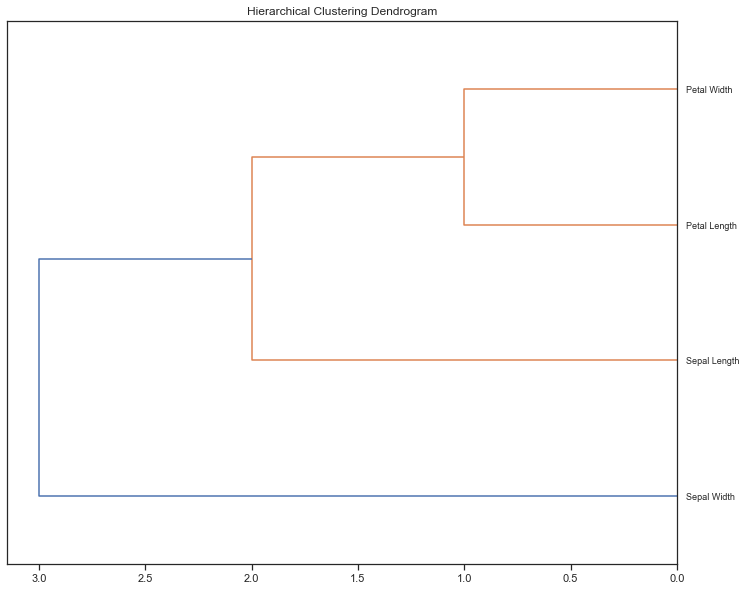

In [142]:
#Code from Week 05 - In class activity (changed the figsize)
figure = plt.figure(figsize=(12, 10))
labels = mutual_info.index.values
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=labels, orientation='left', leaf_font_size=9)
plt.show()

The most similar features are Petal Width and Petal Length, while Sepal Width is most different from the other features.